In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the FER2013 dataset
df = pd.read_csv('fer2013.csv')

# Preprocess the data
pixels = df['pixels'].tolist()
X = np.array([np.fromstring(pixel, dtype=int, sep=' ').reshape(48, 48, 1) for pixel in pixels])
X = X / 255.0  # Normalize pixel values to be between 0 and 1
y = df['emotion'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



###  Load the VGG16 model pre-trained on ImageNet data

In [7]:
# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(include_top=False, input_shape=(48, 48, 3), weights='imagenet')

# Convert single-channel grayscale images to three channels
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

model_transfer = models.Sequential()
model_transfer.add(base_model)

# Add custom top layers for emotion classification
model_transfer.add(layers.Flatten())
model_transfer.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_transfer.add(layers.BatchNormalization())
model_transfer.add(layers.Dropout(0.5))
model_transfer.add(layers.Dense(7, activation='softmax'))

# Compile the model
model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [8]:
# Train the model
history_transfer = model_transfer.fit(X_train_rgb, y_train, epochs=15, validation_data=(X_test_rgb, y_test))

Epoch 1/15
898/898 [==============================] - 910s 1s/step - loss: 2.0757 - accuracy: 0.2571 - val_loss: 3.5015 - val_accuracy: 0.2459
Epoch 2/15
898/898 [==============================] - 885s 986ms/step - loss: 1.5889 - accuracy: 0.3736 - val_loss: 2.5170 - val_accuracy: 0.2058
Epoch 3/15
898/898 [==============================] - 854s 951ms/step - loss: 1.5106 - accuracy: 0.4019 - val_loss: 1.7753 - val_accuracy: 0.3066
Epoch 4/15
898/898 [==============================] - 869s 968ms/step - loss: 1.4467 - accuracy: 0.4213 - val_loss: 1.6555 - val_accuracy: 0.3284
Epoch 5/15
898/898 [==============================] - 863s 961ms/step - loss: 1.4092 - accuracy: 0.4330 - val_loss: 1.4059 - val_accuracy: 0.4361
Epoch 6/15
898/898 [==============================] - 849s 945ms/step - loss: 1.3724 - accuracy: 0.4514 - val_loss: 1.4207 - val_accuracy: 0.4347
Epoch 7/15
898/898 [==============================] - 864s 963ms/step - loss: 1.3325 - accuracy: 0.4648 - val_loss: 1.4086 - va

225/225 [==============================] - 40s 178ms/step - loss: 1.4865 - accuracy: 0.5293
Transfer Learning Model:
Training Accuracy: 0.7275070548057556, Validation Accuracy: 0.5292560458183289, Test Accuracy: 0.5292560458183289


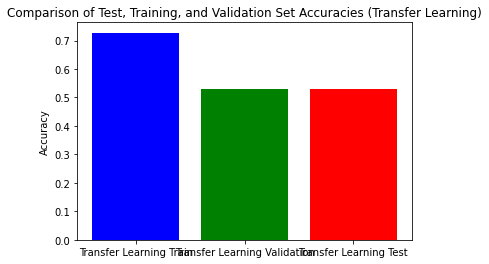

225/225 [==============================] - 40s 176ms/step


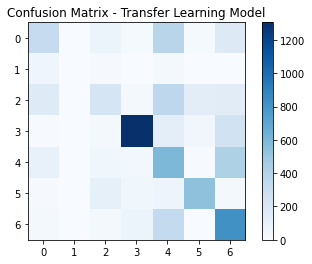

In [9]:
# Evaluate the model on the training set, validation set, and test set
train_loss_transfer, train_acc_transfer = model_transfer.evaluate(X_train_rgb, y_train)
val_loss_transfer, val_acc_transfer = model_transfer.evaluate(X_test_rgb, y_test)
test_loss_transfer, test_acc_transfer = model_transfer.evaluate(X_test_rgb, y_test)

# Print the evaluation results
print("Transfer Learning Model:")
print(f"Training Accuracy: {train_acc_transfer}, Validation Accuracy: {val_acc_transfer}, Test Accuracy: {test_acc_transfer}")

# Plot the comparison of test set, training set, and validation set accuracies
labels_transfer = ['Transfer Learning Train', 'Transfer Learning Validation', 'Transfer Learning Test']
accuracies_transfer = [train_acc_transfer, val_acc_transfer, test_acc_transfer]

plt.bar(labels_transfer, accuracies_transfer, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Test, Training, and Validation Set Accuracies (Transfer Learning)')
plt.show()

# Plot the confusion matrix for the transfer learning model
predictions_transfer = model_transfer.predict(X_test_rgb)
y_pred_transfer = np.argmax(predictions_transfer, axis=1)

cm_transfer = confusion_matrix(y_test, y_pred_transfer)
plt.imshow(cm_transfer, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Transfer Learning Model')
plt.colorbar()
plt.show()


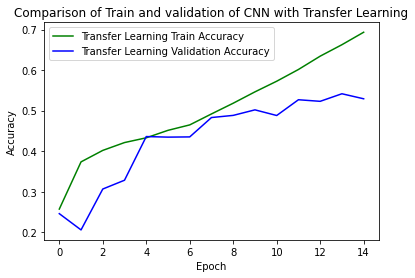

In [20]:
plt.plot(history_transfer.history['accuracy'],'g', label='Transfer Learning Train Accuracy')
plt.plot(history_transfer.history['val_accuracy'],'b', label='Transfer Learning Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and validation of CNN with Transfer Learning')
plt.legend()
plt.show()